# DPV Assignment 2


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize':(12,6)})

In [10]:
df = pd.read_csv("BI_Raw_Data.csv", encoding = 'ISO- 8859-1', delimiter = ";")

df

,Order_ID,Order_Date_Year,Order_Date_Month,Order_Date_Day,Order_Price_Total,Customer_Name,Customer_Country,Product_Name,Product_Category,Product_Order_Unit_Price,Product_Order_Quantity,Product_Order_Price_Total
0,11074,2009,9,10-9-2009,244.3,Simons bistro,Denmark,Pavlova,Confections,17.45,14,244.3
1,11075,2009,9,10-9-2009,586.0,Richter Supermarkt,Switzerland,Chang,Beverages,19.00,10,190.0
2,11075,2009,9,10-9-2009,586.0,Richter Supermarkt,Switzerland,Lakkalikööri,Beverages,18.00,2,36.0
3,11075,2009,9,10-9-2009,586.0,Richter Supermarkt,Switzerland,Spegesild,Seafood,12.00,30,360.0
4,11076,2009,9,10-9-2009,1057.0,Bon app',France,Grandma's Boysenberry Spread,Condiments,25.00,20,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2150,10249,2007,11,10-11-2007,1863.4,Toms Spezialitäten,Germany,Tofu,Produce,18.60,9,167.4
2151,10249,2007,11,10-11-2007,1863.4,Toms Spezialitäten,Germany,Manjimup Dried Apples,Produce,42.40,40,1696.0
2152,10248,2007,11,9-11-2007,440.0,Vins et alcools Chevalier,France,Queso Cabrales,Dairy Products,14.00,12,168.0
2153,10248,2007,11,9-11-2007,440.0,Vins et alcools Chevalier,France,Mozzarella di Giovanni,Dairy Products,34.80,5,174.0


### Business Questions

1. Who are Mr. Bezos' **top-5** most valued **customers**?
2. What are Mr. Bezos' **top-5** most important **products**?

,Order_Price_Total,Customer_Name
538,17250.0,QUICK-Stop
124,16321.9,Save-a-lot Markets
258,15810.0,Hanari Carnes
1821,12281.2,Queen Cozinha
1684,11493.2,Mère Paillarde


[Text(0.5, 1.0, 'Top 5 Most Valued Customers')]

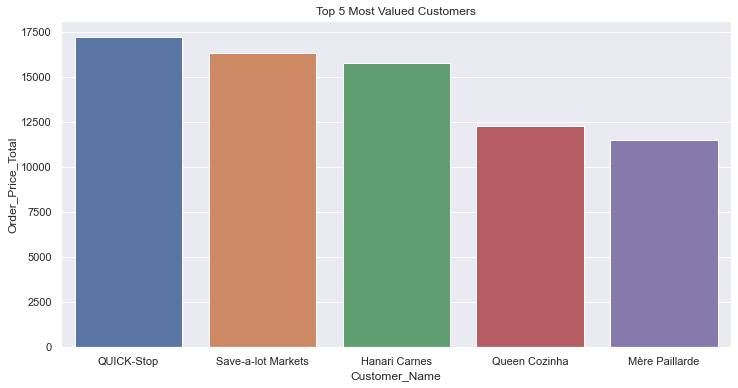

In [11]:
# Remove all unwanted rows
cleaned_df = df.loc[:, ['Order_Price_Total', 'Customer_Name']]

# Sort dataset by the Order_Price_Total which indicates the total amount a customer has spent there
sorted_df = cleaned_df.sort_values('Order_Price_Total', ascending=False)

# Remove multiple records of orders from the same customer
dup_dropped_df = sorted_df.drop_duplicates(subset='Customer_Name')

# Remove unwanted colums and only keep the Top 5
top_5_df = dup_dropped_df[:5]

# Display the Top 5
display(top_5_df)
sns.barplot(data=top_5_df, x='Customer_Name', y='Order_Price_Total').set(title="Top 5 Most Valued Customers")

,Product_Order_Price_Total,Product_Order_Quantity
Product_Name,,
Côte de Blaye,149984.2,623
Thüringer Rostbratwurst,87736.4,746
Raclette Courdavault,76296.0,1496
Camembert Pierrot,50286.0,1577
Tarte au sucre,49827.9,1083


[Text(0.5, 1.0, 'Top 5 Most Important Products')]

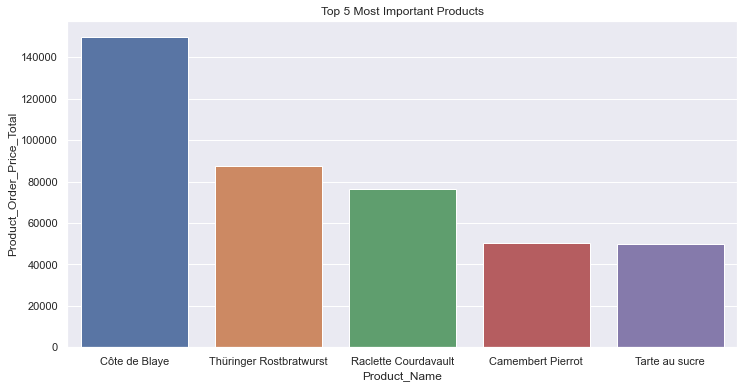

In [12]:
# Remove all unwanted rows
cleaned_df = df.loc[:, ['Product_Name', 'Product_Order_Price_Total', 'Product_Order_Quantity']]

# Group the products together and sum their Order Price Total and Order Quantity
summed_df = cleaned_df.groupby('Product_Name').sum()

# Sort the products according to their value
sorted_df = summed_df.sort_values('Product_Order_Price_Total', ascending=False)

# Only display the Top 5
top_5_df = sorted_df[:5]

display(top_5_df)
sns.barplot(data=top_5_df, x=top_5_df.index, y='Product_Order_Price_Total').set(title="Top 5 Most Important Products")